# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: ANOVA
### VIDEO: One-way repeated-measures ANOVA
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd

c:\anaconda\envs\pytorch2023\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
### rmANOVA (Repeated Measures ANOVA): Has at least one factor that involves taking multiple measurements from the same individual.
## Example: effect of snacks on mood (same individuals try different levels - snacks - in the experiment)

## data parameters

# group means
mean1 = 4
mean2 = 3.8
mean3 = 7

# samples (same across group) - there is one group, so one sample size, but every individual is measured 3 times
N = 30

# standard deviation
stdev = 2


In [14]:
## now to simulate the data (note this is meant to simulate data from same individuals but measured 3 times)
data1 = mean1 + np.random.randn(N)*stdev
data2 = mean2 + np.random.randn(N)*stdev
data3 = mean3 + np.random.randn(N)*stdev

# vertical stack and transposing allows the data in each iteration above to go into it's own column for the dataframe
datamat = np.vstack((data1,data2,data3)).T # .T transposes so the rows are stacked vertically. Ex: 2 rows of 3 cols become 3 rows of 2 cols

# convert to a pandas dataframe
# each col corresponds to a level (the tests/measurements for each level with the same group of individuals)
df = pd.DataFrame(data=datamat,columns=['d1','d2','d3']) # dimension 1,2,3 (the different levels)
df

,d1,d2,d3
0,6.886844,3.849603,5.542704
1,7.234246,1.520290,6.637530
2,3.459457,5.799295,4.179851
3,4.632713,6.040945,9.253875
4,3.100142,3.141248,5.564231
5,1.735055,0.756437,9.004404
6,6.074077,2.550713,5.965522
7,5.853997,4.457674,8.158822
8,6.076230,2.554561,6.220604
9,4.584023,0.148849,11.260897


In [15]:

# use the function from pengouin package for repeated measures anova:
pg.rm_anova(data=df,detailed=True) # use detailed=True (false is default) to get a little more info on the table
# should show that p-unc (p-value) is much less than .05, so there is a significant difference between some groups in the anova

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Within,220.969504,2,110.484752,31.642337,5.117290e-10,0.414636,0.944163
1,Error,202.517142,58,3.491675,NaN,NaN,NaN,NaN


<Axes: >

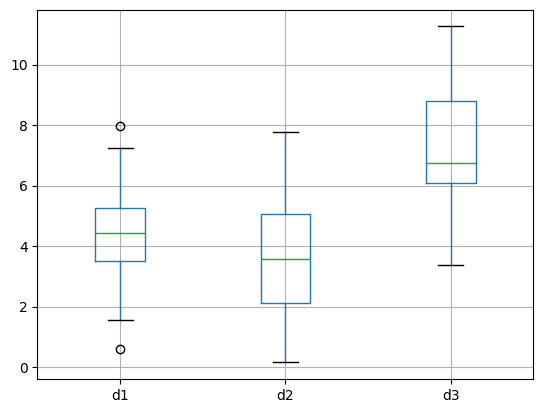

In [16]:
df.boxplot() # helps us visualize the data after generating the anova

In [17]:
## example from SPSS website - good reference for tutorials
# can compare the output here to the website result
# https://www.spss-tutorials.com/repeated-measures-anova/#example

data = [
    [8, 7, 6, 7],
    [5, 8, 5, 6],
    [6, 5, 3, 4],
    [6, 6, 7, 3],
    [8, 10, 8, 6],
    [6, 5, 6, 3],
    [6, 5, 2, 3],
    [9, 9, 9, 6],
    [5, 4, 3, 7],
    [7, 6, 6, 5]]


df = pd.DataFrame(data=data,columns=['1','2','3','4'])

pg.rm_anova(data=df,detailed=True)

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Within,18.2,3,6.066667,3.615894,0.025787,0.130372,0.697356
1,Error,45.3,27,1.677778,NaN,NaN,NaN,NaN
